In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [6]:
df=df.drop_duplicates()

In [7]:
df=df.drop("fnlwgt",axis=1)

In [9]:
df.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [12]:
df['workclass']=df['workclass'].replace("?","Null")

In [13]:
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
Null                 2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [15]:
df['workclass'] = label_encoder.fit_transform(df['workclass']) 

In [16]:
df['workclass'].value_counts()

4    33860
6     3861
1     3136
3     2795
7     1981
5     1694
0     1432
8       21
2       10
Name: workclass, dtype: int64

In [17]:
df['education'].value_counts()

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

In [18]:
df['education'] = label_encoder.fit_transform(df['education']) 
df['education'].value_counts()

11    15770
15    10863
9      8013
12     2656
8      2060
1      1812
7      1601
0      1389
5       954
14      834
6       756
2       655
10      594
4       507
3       245
13       81
Name: education, dtype: int64

In [19]:
df['marital-status'].value_counts()

Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [20]:
df['marital-status'] = label_encoder.fit_transform(df['marital-status']) 
df['marital-status'].value_counts()

2    22366
4    16082
0     6630
5     1530
6     1518
3      627
1       37
Name: marital-status, dtype: int64

In [21]:
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [24]:
df['ocupation']=df['occupation'].replace("?","Null")

In [26]:
df['occupation'] = label_encoder.fit_transform(df['occupation']) 
df['occupation'].value_counts()

10    6165
3     6102
4     6082
1     5606
12    5501
8     4919
7     3017
0     2805
14    2355
6     2071
5     1485
13    1445
11     982
9      240
2       15
Name: occupation, dtype: int64

In [27]:
df['relationship'].value_counts()

Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [28]:
df['relationship'] = label_encoder.fit_transform(df['relationship']) 
df['relationship'].value_counts()

0    19703
1    12557
3     7569
4     5124
5     2331
2     1506
Name: relationship, dtype: int64

In [29]:
df["race"].value_counts()

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [30]:
df['race'] = label_encoder.fit_transform(df['race']) 
df['race'].value_counts()

4    41714
2     4683
1     1517
0      470
3      406
Name: race, dtype: int64

In [31]:
df['gender'].value_counts()

Male      32614
Female    16176
Name: gender, dtype: int64

In [32]:
df['gender'] = label_encoder.fit_transform(df['gender']) 
df['gender'].value_counts()

1    32614
0    16176
Name: gender, dtype: int64

In [33]:
df['native-country'].value_counts()

United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [34]:
df['native-country']=df['native-country'].replace("?","Null")

In [35]:
df['native-country'] = label_encoder.fit_transform(df['native-country']) 
df['native-country'].value_counts()

39    43792
25      943
27      856
30      294
10      206
33      184
1       182
7       155
18      151
4       138
8       127
2       122
35      115
22      106
21      105
5       103
23       92
31       87
12       86
40       86
3        85
13       75
32       67
36       65
19       59
11       49
26       49
29       46
6        45
9        38
20       37
16       30
37       30
0        28
38       27
24       23
41       23
28       23
34       21
15       20
17       19
14        1
Name: native-country, dtype: int64

In [36]:
df['income'].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

In [37]:
df['income'] = label_encoder.fit_transform(df['income']) 
df['income'].value_counts()

0    37109
1    11681
Name: income, dtype: int64

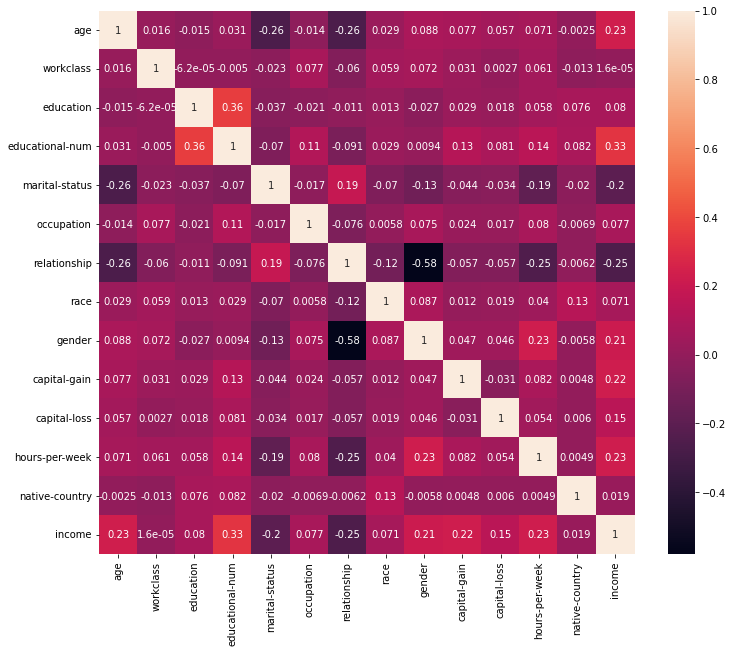

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [38]:
X = df[['age','workclass','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','native-country']].values 
y = df['income'].values

In [43]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, y, test_size = 0.25, random_state = 50)

print("Shape of train_X: " ,train_X.shape)
print("Shape of test_X: " ,test_X.shape)

Shape of train_X:  (36592, 11)
Shape of test_X:  (12198, 11)


In [44]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [51]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

**RANDOM** **FOREST**

In [46]:
rf = RandomForestRegressor()
rf.fit(train_X, train_Y)
rf_predict = rf.predict(test_X)

In [50]:
mae_rf = mean_absolute_error(test_Y, rf_predict)
mse_rf = mean_squared_error(test_Y, rf_predict)
print("MAE score of Random Forest model :" , mae_rf)
print("MSE score of Random Forest model :" , mse_rf)

MAE score of Random Forest model : 0.19262336705290425
MSE score of Random Forest model : 0.11360194382935966


**KNN**

In [52]:
n = 7
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(train_X, train_Y)
knn_predict = knn.predict(test_X)

In [53]:
mae_knn = mean_absolute_error(test_Y, knn_predict)
mse_knn = mean_squared_error(test_Y, knn_predict)
print("MAE score of KNN model :" , mae_knn)
print("MSE score of KNN model :" , mse_knn)

MAE score of KNN model : 0.16199376947040497
MSE score of KNN model : 0.16199376947040497
